In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

1.Получите базовое решение:
- Сделайте минимальные преобразования
- Обучите модель
- Выберете и посчитайте метрику качества

In [261]:
# Загружаем информацию
data_in = pd.read_csv('creditcard.csv')

In [536]:
# Копируем фрейм для работы
data = data_in.copy()

In [537]:
# Бегло просмотрим данные, определим минимальный набор обработки для базовой модели
data.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [538]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [539]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [540]:
# Все данные уже количественные, пропусков нет. 
# Проведем масштабирование данных и обучим базовую модель

# Сначала разделим данные на обучение и валидацию
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='Class'),
                                                    data['Class'],
                                                   random_state=41,
                                                   stratify=data['Class'], 
                                                    shuffle=True,
                                                   test_size=0.2)


In [541]:
# То же что и StandardScaler, но возвращает фреймом с индекосами

class MyScaler():
    def fit(self, data, *args, **kwargs):
        self.columns = data.columns
        self.args = args
        self.kwargs = kwargs
        self.scaler = StandardScaler(with_std=True, with_mean=True)
        self.scaler.fit(data)
        return self
    
    def transform(self, data, *args, **kwargs):
        idx = data.index
        st = StandardScaler()
        scaled = self.scaler.transform(data)
        data_out = pd.DataFrame(scaled, columns=self.columns, index=idx)
        return data_out


In [542]:
# Трасформируем тестовые и тренеровочные данные
scaler = MyScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [543]:
# Обучаем базовую модель
base_model = LogisticRegression()
base_model.fit(X_train, y_train)
base_predict = base_model.predict(X_test)
base_predict_proba = pd.DataFrame(base_model.predict_proba(X_test))[1]

In [544]:
# Записываем результаты в фрейм
results = classification_report(y_test, base_predict, output_dict=True)
rocauc_base = roc_auc_score(y_test.values, base_predict_proba)

In [545]:
# Из classification_report заберем макро значения метрик

all_results = pd.DataFrame(columns = ['precision', 'recall', 'F-score', 
                                      'ROC_AUC', 'precision 1', 'recall 1', 'F-score 1'])
all_results.loc['Базовая модель'] = [results['macro avg']['precision'], 
                               results['macro avg']['recall'], 
                              results['macro avg']['f1-score'],
                              round(rocauc_base, 2),
                                results['1']['precision'], 
                               results['1']['recall'], 
                              results['1']['f1-score']]
all_results

,precision,recall,F-score,ROC_AUC,precision 1,recall 1,F-score 1
Базовая модель,0.945802,0.795857,0.855622,0.97,0.892308,0.591837,0.711656


In [546]:
# Баланс целевого свойства
y_balance = y_train.value_counts()
y_balance

0    227451
1       394
Name: Class, dtype: int64

<h5>Предварительные результаты:</h5>

 - Высокий показатель ROC_AUC - score = 0.97

 - Высокий показатель устредненного Precision = 0.94
 
 - Низкие показатели F-score = 0.711 целевого признака и соответственно Recall целевого признака = 0.59

Из-за дисбаланса количества категорий в целевом свойстве модель недообучена на признаке '1' - 'YES'. 

<h5>Дальнейшие шаги работы:</h5>

 - Проведите балансировку данных минимум тремя методами
 
 - Обучите модель классификации с целевым признаком Class
 
 - Оцените подходящие метрики качества
 
 - Сформулируйте выводы по проделанной работе

Взглянем на графические данные для балансировки:

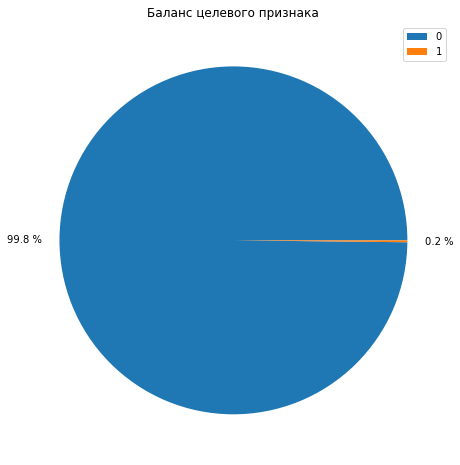

In [547]:
y_balance_proc = round(y_balance / y_balance.sum(), 3) * 100
plt.figure(figsize=(8, 8))
plt.pie(y_balance, labels=y_balance_proc.astype(str) + ' %')
plt.legend(y_balance.index )
plt.title('Баланс целевого признака')
plt.show()

План ребалансировки целевого признака:
1. Сгенерируем дополнительные синтетические данные методом SMOTE (Oversampling)
2. Проведем прямую Oversampling балансировку целевого признака
3. Проведем прямую Undersampling балансировку целевого признака

PS:
При помощи метода Tomek links с таким количеством фичей слишком долго


Для каждого шага посчитаем метрики, сделаем выводы о результатх.


In [548]:
# Импортируем библиотеку для балансировки данных
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [549]:
# Кастомный балансер для требуемых методов
class Balanser():
    
    def __init__(self, method=None, strategy=1):
        self.strategy = strategy
        self.name = method
        self.method = {'SMOTE': SMOTE,
                      'Tomek': TomekLinks,
                      'over': RandomOverSampler,
                      'under': RandomUnderSampler}[method]
        
    def __repr__(self):
        return f'{self.name} strategy: {self.strategy}\n'
        
    def fit(self, a, b, *args):
        self.a = a
        self.b = b
        return self
        
    def transform(self, *args):
        print(f'\nБалансировка {self}\n')
        if self.name == 'Tomek':
            resampler = self.method(sampling_strategy=self.strategy, n_jobs=-1)
            
        else:
            resampler = self.method(sampling_strategy=self.strategy)
        self.a, self.b = resampler.fit_resample(self.a, self.b)
        return self.a, self.b

In [550]:
# Кастомный пайплайн с функционалом оценки и отчета

class MyPipeline():
    def __init__(self, *args):
        '''
        Функция для загрузки классов - балансеров в паплайн
        '''     
        self.steps = [*args]
        
    def __repr__(self):
        return str(self.steps).strip('[]').replace(', ','').replace('None', 'Базовая модель\n')
    
    def fit(self, x, y):
        '''
        Функция для загрузки данных в каждый балансер
        '''
        
        for rebalanser in self.steps:
            if rebalanser:    
                rebalanser.fit(x, y)
            else:
                self.x = x
                self.y = y
        print(f'Fitted: \n{self}')
        
    def transform(self):
        '''
        Функция для ребеланса загруженных данных
        '''
        
        self.data_res = []
        for rebalanser in self.steps:
            if rebalanser:
                self.data_res.append(rebalanser.transform())
            else:
                self.data_res.append((self.x, self.y))
        print(f'\nFitted and transformed: \n{self}')

                                     
    def score_regressions(self, X_test, y_test):
        '''
        Функция для перебора всех балансировок, и построения моделей к каждому варианту
        '''
        
        # Это болванка итогового отчета
        score = pd.DataFrame(columns = ['precision', 
                                        'recall', 
                                        'F-score', 
                                        'ROC_AUC', 
                                        'precision 1', 
                                        'recall 1', 
                                        'F-score 1'])
        
        # Итерируемся по балансированным данным и названиям балансировок 
        for balansed, name in zip(self.data_res, self.steps):
            
            # Новая модель
            regr = LogisticRegression()
            regr.fit(*balansed)
            
            # Предиктим
            pred = regr.predict(X_test)
            pred_prob = pd.DataFrame(regr.predict_proba(X_test))[1]
            
            # Оцениваем
            report = classification_report(y_test, pred, output_dict=True)
            roc = roc_auc_score(y_test.values, pred_prob.values)
            
            #Записываем
            score.loc[f'{name}'.strip()] = [report['macro avg']['precision'], 
                               report['macro avg']['recall'], 
                              report['macro avg']['f1-score'],
                              round(roc, 2),
                                report['1']['precision'], 
                               report['1']['recall'], 
                              report['1']['f1-score']]
        
        # Запоминаем и наводим красоту    
        self.score = score.rename(index={"None": 'Базовая модель'})
        return self.score

    
    def final_model_score(self, X_test, y_test):
        a = self.x
        b = self.y
        for rebalanser in self.steps:
            if rebalanser:
                a, b = rebalanser.transform(a, b)
                
        score = pd.DataFrame(columns = ['precision', 
                                'recall', 
                                'F-score', 
                                'ROC_AUC', 
                                'precision 1', 
                                'recall 1', 
                                'F-score 1'])
                
        # Новая модель
        regr = LogisticRegression()
        regr.fit(a, b)

        # Предиктим
        pred = regr.predict(X_test)
        pred_prob = pd.DataFrame(regr.predict_proba(X_test))[1]

        # Оцениваем
        report = classification_report(y_test, pred, output_dict=True)
        roc = roc_auc_score(y_test.values, pred_prob.values)

        #Записываем
        score.loc['Final'] = [report['macro avg']['precision'], 
                           report['macro avg']['recall'], 
                          report['macro avg']['f1-score'],
                          round(roc, 2),
                            report['1']['precision'], 
                           report['1']['recall'], 
                          report['1']['f1-score']]
        return score

In [551]:
# Тут заряжаем в паплайн SMOTE с разной величиной балансировки. None - то же что и базовая модель
ScorePipe = MyPipeline(
                    None,
                    Balanser('SMOTE', strategy=0.002), 
                    Balanser('SMOTE', strategy=0.003), 
                    Balanser('SMOTE', strategy=0.004),
                    Balanser('SMOTE', strategy=0.005),
                    Balanser('SMOTE', strategy=0.006),
                    Balanser('SMOTE', strategy=0.007),
                    Balanser('SMOTE', strategy=0.008)
)

In [552]:
# Смотрим что заряжено (__repr__ удобная штука)
ScorePipe

Базовая модель
SMOTE strategy: 0.002
SMOTE strategy: 0.003
SMOTE strategy: 0.004
SMOTE strategy: 0.005
SMOTE strategy: 0.006
SMOTE strategy: 0.007
SMOTE strategy: 0.008

In [553]:
# Фотим паплайн на данных
ScorePipe.fit(X_train, y_train)

Fitted: 
Базовая модель
SMOTE strategy: 0.002
SMOTE strategy: 0.003
SMOTE strategy: 0.004
SMOTE strategy: 0.005
SMOTE strategy: 0.006
SMOTE strategy: 0.007
SMOTE strategy: 0.008



In [554]:
# Проведем балансировки с разными стратегиями
ScorePipe.transform()


Балансировка SMOTE strategy: 0.002



Балансировка SMOTE strategy: 0.003



Балансировка SMOTE strategy: 0.004



Балансировка SMOTE strategy: 0.005



Балансировка SMOTE strategy: 0.006



Балансировка SMOTE strategy: 0.007



Балансировка SMOTE strategy: 0.008



Fitted and transformed: 
Базовая модель
SMOTE strategy: 0.002
SMOTE strategy: 0.003
SMOTE strategy: 0.004
SMOTE strategy: 0.005
SMOTE strategy: 0.006
SMOTE strategy: 0.007
SMOTE strategy: 0.008



In [555]:
# Запустим обучение и подсчет метрик для каждого варианта стратегий
Scores = ScorePipe.score_regressions(X_test, y_test)
Scores

,precision,recall,F-score,ROC_AUC,precision 1,recall 1,F-score 1
Базовая модель,0.945802,0.795857,0.855622,0.97,0.892308,0.591837,0.711656
SMOTE strategy: 0.002,0.934449,0.806043,0.859075,0.97,0.869565,0.612245,0.718563
SMOTE strategy: 0.003,0.936454,0.851953,0.889659,0.97,0.873418,0.704082,0.779661
SMOTE strategy: 0.004,0.924199,0.872335,0.896572,0.97,0.848837,0.744898,0.793478
SMOTE strategy: 0.005,0.919320,0.872326,0.894423,0.97,0.839080,0.744898,0.789189
SMOTE strategy: 0.006,0.906382,0.877402,0.891354,0.97,0.813187,0.755102,0.783069
SMOTE strategy: 0.007,0.893406,0.877375,0.885223,0.97,0.787234,0.755102,0.770833
SMOTE strategy: 0.008,0.894535,0.882477,0.888412,0.97,0.789474,0.765306,0.777202


In [556]:
# Лучшее соотношение баланса класса
ScorePipe.data_res[3][1].value_counts()

0    227451
1       909
Name: Class, dtype: int64

Удалось поднять метрики усредненого F-score на 3% при падении precision на ~4%:

SMOTE strategy: 0.004

In [557]:
ScorePipe2 = MyPipeline(
                        None,
                    Balanser('over', strategy=0.002), 
                    Balanser('over', strategy=0.005), 
                    Balanser('over', strategy=0.007),
                    Balanser('over', strategy=0.01),
                    Balanser('over', strategy=0.012),
                    Balanser('over', strategy=0.015),
                    Balanser('over', strategy=0.017)
)

In [558]:
ScorePipe2.fit(X_train, y_train)

Fitted: 
Базовая модель
over strategy: 0.002
over strategy: 0.005
over strategy: 0.007
over strategy: 0.01
over strategy: 0.012
over strategy: 0.015
over strategy: 0.017



In [559]:
ScorePipe2.transform()


Балансировка over strategy: 0.002



Балансировка over strategy: 0.005



Балансировка over strategy: 0.007



Балансировка over strategy: 0.01



Балансировка over strategy: 0.012



Балансировка over strategy: 0.015



Балансировка over strategy: 0.017



Fitted and transformed: 
Базовая модель
over strategy: 0.002
over strategy: 0.005
over strategy: 0.007
over strategy: 0.01
over strategy: 0.012
over strategy: 0.015
over strategy: 0.017



In [560]:
# Лучшее соотношение баланса класса
Scores2 = ScorePipe2.score_regressions(X_test, y_test)
Scores2

,precision,recall,F-score,ROC_AUC,precision 1,recall 1,F-score 1
Базовая модель,0.945802,0.795857,0.855622,0.97,0.892308,0.591837,0.711656
over strategy: 0.002,0.928237,0.806035,0.856932,0.97,0.857143,0.612245,0.714286
over strategy: 0.005,0.906382,0.877402,0.891354,0.98,0.813187,0.755102,0.783069
over strategy: 0.007,0.878586,0.882442,0.880504,0.98,0.757576,0.765306,0.761421
over strategy: 0.01,0.876044,0.887535,0.881703,0.98,0.752475,0.775510,0.763819
over strategy: 0.012,0.873602,0.892629,0.882878,0.98,0.747573,0.785714,0.766169
over strategy: 0.015,0.857622,0.897687,0.876587,0.98,0.715596,0.795918,0.753623
over strategy: 0.017,0.864310,0.897704,0.880272,0.98,0.728972,0.795918,0.760976


In [561]:
ScorePipe2.data_res[2][1].value_counts()

0    227451
1      1137
Name: Class, dtype: int64

Удалось поднять метрики за счет увеличения доли 

Oversampling strategy: 0.005

Используем UnderSampling

In [562]:
ScorePipe3 = MyPipeline(
                        None,
                    Balanser('under', strategy=0.002), 
                    Balanser('under', strategy=0.005), 
                    Balanser('under', strategy=0.007),
                    Balanser('under', strategy=0.01),
                    Balanser('under', strategy=0.012),
                    Balanser('under', strategy=0.015),
                    Balanser('under', strategy=0.017)
)

In [563]:
ScorePipe3.fit(X_train, y_train)

Fitted: 
Базовая модель
under strategy: 0.002
under strategy: 0.005
under strategy: 0.007
under strategy: 0.01
under strategy: 0.012
under strategy: 0.015
under strategy: 0.017



In [564]:
ScorePipe3.transform()


Балансировка under strategy: 0.002



Балансировка under strategy: 0.005



Балансировка under strategy: 0.007



Балансировка under strategy: 0.01



Балансировка under strategy: 0.012



Балансировка under strategy: 0.015



Балансировка under strategy: 0.017



Fitted and transformed: 
Базовая модель
under strategy: 0.002
under strategy: 0.005
under strategy: 0.007
under strategy: 0.01
under strategy: 0.012
under strategy: 0.015
under strategy: 0.017



In [565]:
# Лучшее соотношение баланса класса
Scores3 = ScorePipe3.score_regressions(X_test, y_test)
Scores3

,precision,recall,F-score,ROC_AUC,precision 1,recall 1,F-score 1
Базовая модель,0.945802,0.795857,0.855622,0.97,0.892308,0.591837,0.711656
under strategy: 0.002,0.940843,0.806052,0.861244,0.97,0.882353,0.612245,0.722892
under strategy: 0.005,0.889263,0.877366,0.883222,0.98,0.778947,0.755102,0.766839
under strategy: 0.007,0.878586,0.882442,0.880504,0.97,0.757576,0.765306,0.761421
under strategy: 0.01,0.865191,0.887509,0.876018,0.97,0.730769,0.775510,0.752475
under strategy: 0.012,0.860375,0.882398,0.871059,0.98,0.721154,0.765306,0.742574
under strategy: 0.015,0.859628,0.892593,0.875386,0.98,0.719626,0.785714,0.751220
under strategy: 0.017,0.837535,0.892532,0.862953,0.98,0.675439,0.785714,0.726415


In [566]:
ScorePipe3.data_res[3][1].value_counts()

0    56285
1      394
Name: Class, dtype: int64

Удалось поднять метрики за счет уменьшения мажоритарной подгруппы

Undersampling strategy: 0.005

Сделаем итоговую модель применив в ряд 3 обработки:

In [719]:
# Коэффициенты можно подобрать более тщательно гридом
ScoreFinal = MyPipeline(
    None,
    Balanser('SMOTE', 0.0036),
    Balanser('over', 0.0038),
    Balanser('under', 0.004)
)

In [720]:
ScoreFinal.fit(X_train, y_train)

Fitted: 
Базовая модель
SMOTE strategy: 0.0036
over strategy: 0.0038
under strategy: 0.004



In [721]:
score_final = ScoreFinal.final_model_score(X_test, y_test)


Балансировка SMOTE strategy: 0.0036



Балансировка over strategy: 0.0038



Балансировка under strategy: 0.004




In [722]:
score_final #Итоговый скор модели с применением 3 видов балансировки

,precision,recall,F-score,ROC_AUC,precision 1,recall 1,F-score 1
Final,0.894535,0.882477,0.888412,0.98,0.789474,0.765306,0.777202


In [723]:
#Лучшие практики в одной таблице

pd.concat((all_results,
           Scores.loc[Scores['F-score'].idxmax()].to_frame().T,
          Scores2.loc[Scores2['F-score'].idxmax()].to_frame().T,
          Scores3.loc[Scores3['F-score'].idxmax()].to_frame().T,
          score_final))

,precision,recall,F-score,ROC_AUC,precision 1,recall 1,F-score 1
Базовая модель,0.945802,0.795857,0.855622,0.97,0.892308,0.591837,0.711656
SMOTE strategy: 0.004,0.924199,0.872335,0.896572,0.97,0.848837,0.744898,0.793478
over strategy: 0.005,0.906382,0.877402,0.891354,0.98,0.813187,0.755102,0.783069
under strategy: 0.005,0.889263,0.877366,0.883222,0.98,0.778947,0.755102,0.766839
Final,0.894535,0.882477,0.888412,0.98,0.789474,0.765306,0.777202


Применение балансировки позволило улучшить показатели базовой модели без тюнинга параметров.

Модель с наилучшей метрикой F-score удалось получить при помощи метода SMOTE.

Однако комбинируя 3 метода, удалось получить получить модель с лучшим Recall.